<a href="https://colab.research.google.com/github/MirandaCarou/Quantum_Algorithims_Programming/blob/main/QFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Miranda Carou Laiño**

In [1]:
!pip install qiskit qiskit-aer pylatexenc --upgrade

In [2]:
import numpy as np
from math import sqrt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import Counts


def obten_estado(qcirc, etiqueta="|\psi\!\!> = ", bloch=False):
    sim = AerSimulator(method='statevector')
    qc_obj = transpile(qcirc, sim)
    result = sim.run(qc_obj).result()
    estado = result.get_statevector()
    display(estado.draw('latex', prefix=etiqueta))
    if bloch:
      display(estado.draw('bloch'))

def obten_unitaria(qcirc, etiqueta):
    sim_u = AerSimulator(method='unitary')
    qc_obj = transpile(qcirc, sim_u)
    result = sim_u.run(qcirc).result()
    unitary = result.get_unitary(qcirc)
    display(unitary.draw('latex', prefix=etiqueta))

# Lab QFT

Now, you have to do exactly the same than in the previous task but without using the QFT qiskit implementation, that means that you have to use just gates. The implementation has to be general enough to support an arbitrary number of qubits. This means that you have to provide your own implementation for the QFT and IQFT built using the basic quantum gates available in qiskit.

The previous task is :

----
*The qiskit.circuit.library module contains, among other things, the implementation of several standar circuits including the QFT. Check the documentation to see more details. The inverse of the QFT is also accessible through the QFT.inverse() method. Use these facilities to implement a circuit composed by a QFT and an inverse QFT on a 4-qubits state.*

*The composition of the two circuits can be done through append or compose method of the class QuantumCircuit*.

*The verification of the output can be done by different means*:

- *The input is equal to the output*
- *The unitary matrix of the circuit is one*

*In this task you have to verify that the input is equal to the output.*


----

# **IMPLEMENTACIÓN**

Primero de todo, vamos a crear una función generalizada para implementar Quatum Fourier Transform a un circuito de tamaño $n$, basándonos en los desarrollos de los ejercicios anteriores y los apuntes de la asignatura.

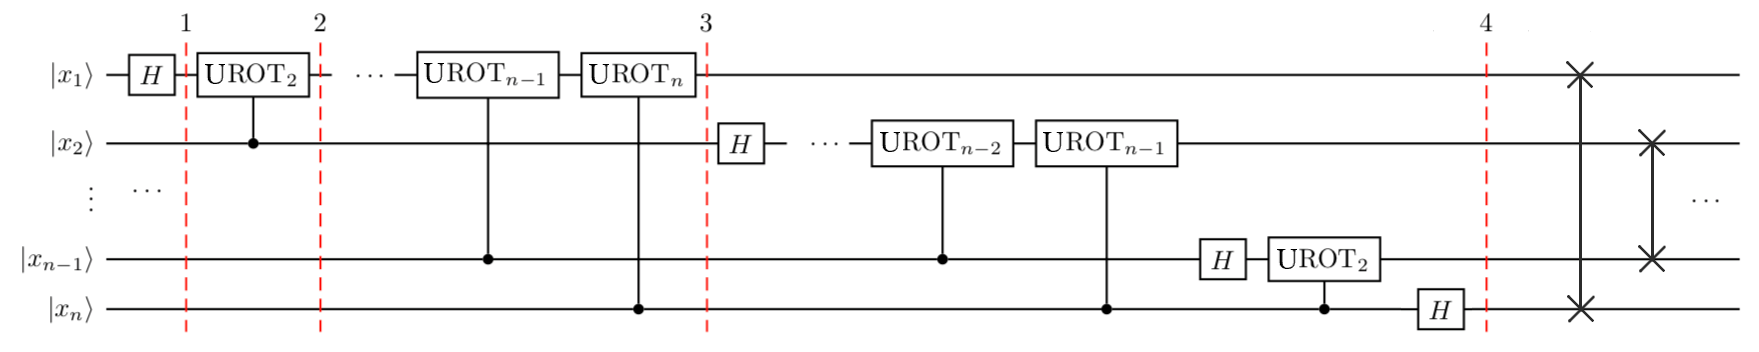

In [3]:
def qft(n):
    qft = QuantumCircuit(n)

    for i in range(n):
        qft.h(n-1-i)
        val = 0

        for j in range(i+1, n):
          val += 1
          phase = np.pi /2**val
          qft.cp( phase , n-1-j, n-1-i)

        qft.barrier()

    for i in range(n // 2):
       qft.swap(i, n - 1 - i)
    return qft

Para crear una función que implemente la Inverse Quantum Fourier Transform, hacemos la inversa de la anterior.

In [4]:
def iqft(n):
    iqft = QuantumCircuit(n)
    for i in range(n // 2):
        iqft.swap(i, n - i - 1)

    for i in range(n):
        val = 0
        iqft.h(i)

        for j in range(i+1, n):
          val += 1
          phase = -np.pi /2**val
          iqft.cp(phase, i, j)

        iqft.barrier()

    return iqft





Antes de nada vamos a hacer una prueba de la implementación de la $QFT$, basándonos en los resultados obtenidos en el notebook del tema correspondiente.

Resultado para $n = 3$ y $\psi = 101$ :

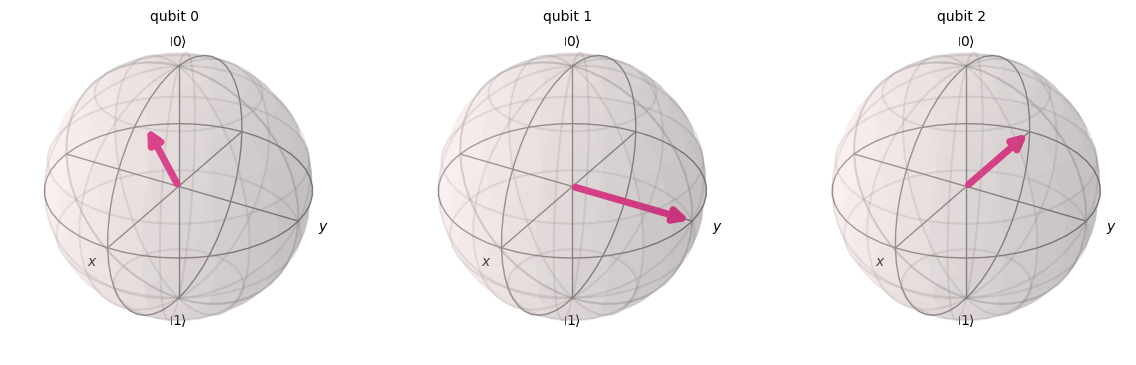

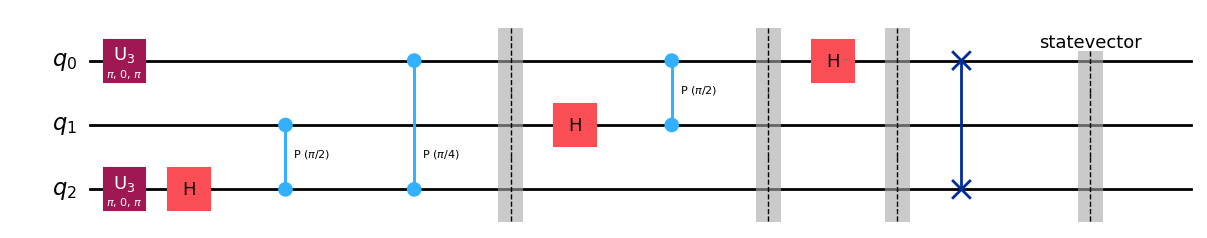

In [5]:
n=3

def implementation_qft(n):
  circuit = QuantumCircuit(n)
  circuit.x(2)
  circuit.x(0)
  circuit.append(qft(n), range(n))
  circuit.save_statevector()

  return circuit

circuit_c = implementation_qft(n)
circuit_c.decompose().draw('mpl')


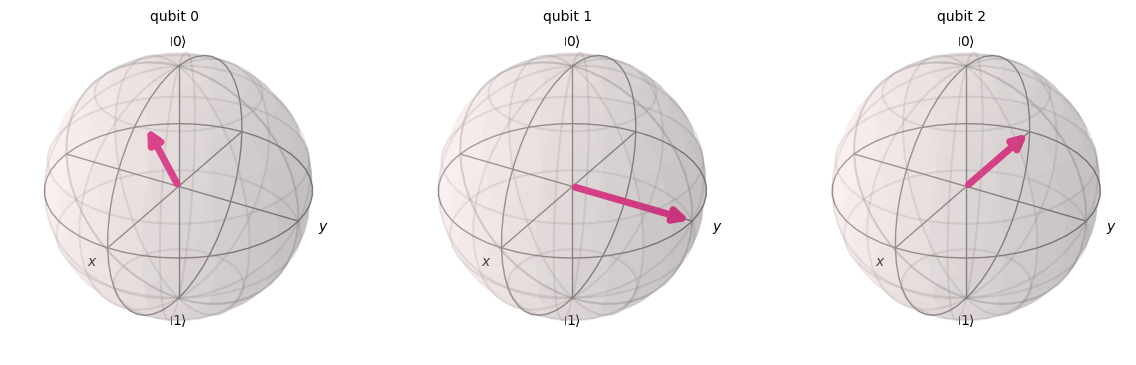

In [6]:
sim = AerSimulator(method='statevector')
result=sim.run(circuit_c.decompose()).result()
final_state = result.get_statevector()
final_state.draw("bloch")

**¡Genial!** Vamos a continuar entonces con lo que nos pide el ejercicio. Implementamos ahora las dos ( $QFT$ y $IQFT$ ) y observamos que el estado inicial y final sean el mismo.

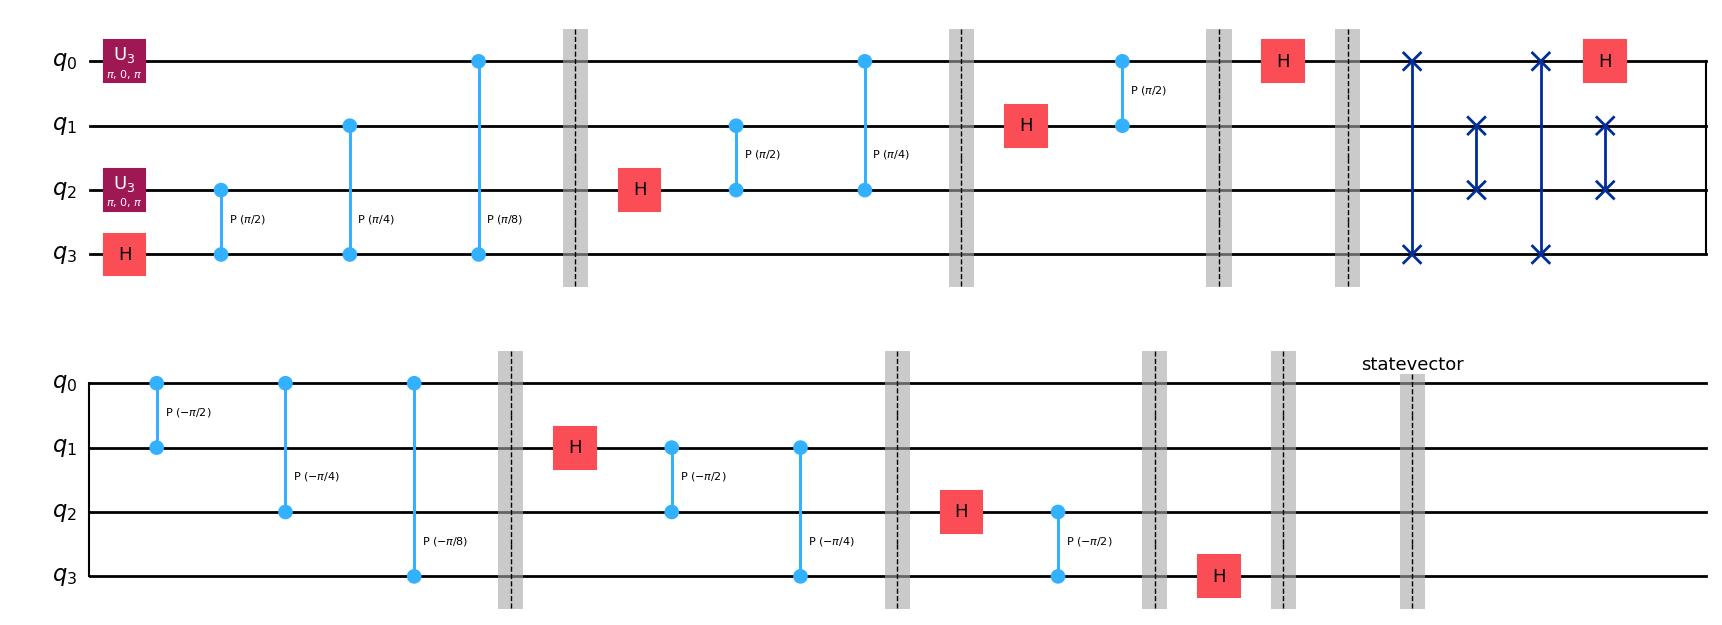

In [7]:
n=4

def implementacion_lab(n):

  circuit = QuantumCircuit(n)
  circuit.x(2)
  circuit.x(0)
  circuit.append(qft(n), range(n))
  circuit.append(iqft(n), range(n))

  circuit.save_statevector()
  return circuit

circuit_cc = implementacion_lab(n)
circuit_cc.decompose().draw('mpl')


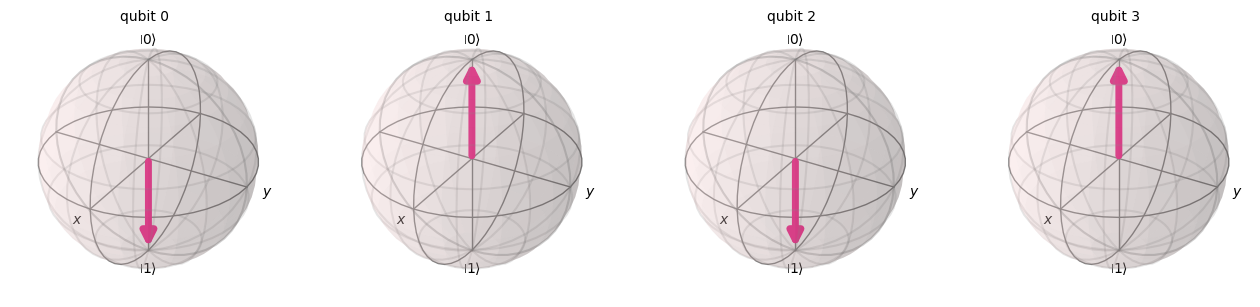

In [8]:
sim = AerSimulator(method='statevector')
result=sim.run(circuit_cc.decompose()).result()
final_state = result.get_statevector()
final_state.draw("bloch")